In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read cvs file 
dfx = pd.read_csv('../csv_files/p2stdev.csv', index_col=0)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
0,2.227033,1.488400,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,17.349352,...,2.275984,1.351792,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915,1.0,0
1,2.524740,0.963174,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,22.583180,...,2.487662,2.487306,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556,0.0,1
2,2.116933,0.806476,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,11.313708,...,1.978602,1.214656,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078,1.0,1
3,2.436077,0.647103,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,13.304135,...,2.188931,1.193831,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040,1.0,1
4,2.075782,0.067659,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,18.330303,...,2.346674,1.315407,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143,1.0,0


In [4]:
# filter out binary variables
dfbinary = dfx.filter(['C2','C3p'])
dfbinary.head()

,C2,C3p
0,1.0,0
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,0


In [6]:
# drop binary variables from dfx dataframe
dfx = dfx.drop(labels=['C2', 'C3p'],axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S1,S2,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
0,2.227033,1.488400,0.029074,17.528157,16.176365,1.927893,21.679483,112.778544,107.517440,17.349352,...,3.957892,2.211554,2.275984,1.351792,0.640426,0.646515,0.615270,0.169556,0.209529,0.221915
1,2.524740,0.963174,-0.013352,17.178286,14.690979,1.720483,28.124722,147.621137,139.946418,22.583180,...,4.140818,2.496333,2.487662,2.487306,0.644753,0.641182,0.609752,0.148247,0.223103,0.221556
2,2.116933,0.806476,0.020715,16.639604,15.424948,1.395264,14.177447,72.539644,69.173694,11.313708,...,3.936497,1.790959,1.978602,1.214656,0.636816,0.646763,0.628717,0.226322,0.184411,0.225078
3,2.436077,0.647103,0.020023,16.513419,15.319588,1.429303,18.110770,90.879040,87.028731,13.304135,...,4.308869,1.973068,2.188931,1.193831,0.539634,0.650793,0.628490,0.213167,0.192593,0.237040
4,2.075782,0.067659,-0.034895,17.241131,15.925724,2.929681,23.916521,121.778487,114.786759,18.330303,...,4.061548,2.302490,2.346674,1.315407,0.587413,0.635767,0.603993,0.165315,0.215782,0.224143


In [7]:
dfx.skew()

C1                0.517378
C3                2.105095
C4               -0.342221
C5                0.563723
C6                0.463836
C7                0.301994
T1                0.300296
T2                0.278941
T3                0.275350
T4                0.243526
T5                0.291481
S1                0.319665
S2                0.421893
S3                0.136849
C5p               0.163372
LongSentences    -0.112615
RealWords         0.193199
LongWords        -0.292071
PositiveWords     0.130638
NegativeWords     0.353207
UncertainWords    0.460775
dtype: float64

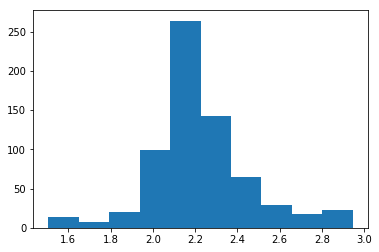

In [8]:
# show distribution of one column
# notice the scale on the x-axis is not 0 to 1
plt.hist(dfx['C1'])
plt.show()

In [9]:
from sklearn import preprocessing
# define column names
names = dfx.columns

# create scaler variable 
scaler = preprocessing.StandardScaler()

# fit and scale data 
dfxstandard = scaler.fit_transform(dfx)
dfxstandard = pd.DataFrame(dfxstandard, columns=names)

In [10]:
# check if data was scaled correctly
# mean and stdev should be equal to or almost equal to 0 and 1 respectively 
dfxstandard.describe()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S1,S2,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,...,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02
mean,-7.371099e-16,1.002782e-16,2.083703e-17,2.995323e-16,-2.185284e-15,3.906943e-17,3.268809e-16,-1.888356e-17,-4.799029e-16,1.693009e-17,...,-7.527377e-16,-8.432486e-16,1.974309e-15,-8.334812e-17,1.082223e-15,4.974841e-16,2.432723e-15,1.429941e-15,-8.100396e-16,-1.069200e-15
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,...,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00
min,-3.003018e+00,-8.708319e-01,-3.046311e+00,-2.669182e+00,-3.027982e+00,-2.412942e+00,-2.624008e+00,-3.088709e+00,-3.110625e+00,-3.078635e+00,...,-3.105811e+00,-2.625592e+00,-3.010865e+00,-3.102178e+00,-3.298476e+00,-7.664677e+00,-7.096903e+00,-3.524846e+00,-3.339850e+00,-3.579637e+00
25%,-5.315021e-01,-6.317953e-01,-6.419006e-01,-6.358801e-01,-6.668820e-01,-6.584950e-01,-6.633327e-01,-6.584405e-01,-6.748366e-01,-6.634190e-01,...,-5.981510e-01,-6.271488e-01,-7.090413e-01,-5.802978e-01,-6.788953e-01,-2.084023e-01,-5.213248e-01,-6.125385e-01,-6.711211e-01,-6.560584e-01
50%,-1.461683e-01,-3.466355e-01,-3.319238e-03,-1.521470e-01,-1.258682e-01,-7.492592e-02,-3.032261e-02,-3.270748e-02,-2.761649e-02,-2.502104e-02,...,-7.210934e-02,-6.367128e-02,-1.411865e-03,3.063847e-03,9.598113e-03,1.105245e-01,3.310552e-02,-4.943467e-02,-4.991345e-02,5.463402e-03
75%,3.691021e-01,1.899863e-01,7.288663e-01,5.763972e-01,5.122234e-01,7.257601e-01,6.144183e-01,5.852731e-01,6.149760e-01,6.057772e-01,...,6.297722e-01,5.769838e-01,6.450816e-01,5.370669e-01,6.511760e-01,4.032022e-01,5.422655e-01,6.042630e-01,5.947703e-01,5.455320e-01
max,3.019685e+00,3.446764e+00,2.646272e+00,3.084676e+00,3.117609e+00,3.047990e+00,3.130786e+00,3.170045e+00,3.186467e+00,3.141925e+00,...,3.165999e+00,3.091764e+00,3.105259e+00,3.376404e+00,3.507758e+00,1.354047e+01,9.811542e+00,3.949526e+00,3.532883e+00,4.297567e+00


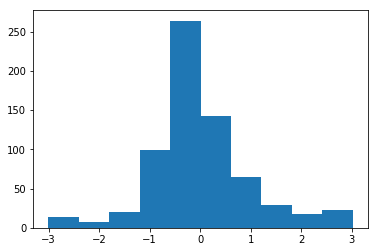

In [11]:
# notice different scale on the x-axis
# data has bee scaled correctly 
plt.hist(dfxstandard['C1'])
plt.show()

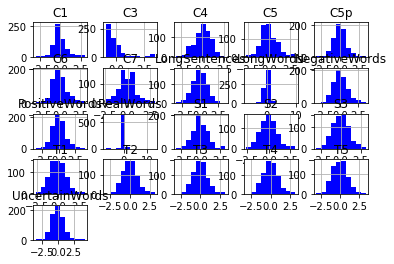

In [12]:
# examine distribution for all variables 
for col in dfxstandard.columns:
    dfxstandard.hist(color='blue') #, range=(-2,2))
    break
plt.show()

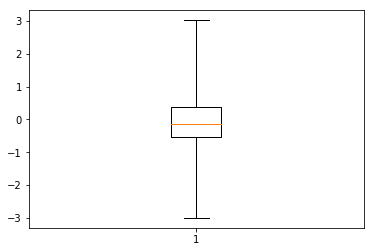

In [15]:
# use boxplots as another way to check if the variables have been scaled correctly
# mean line should line up with the 0 tick mark on the left axis 
plt.boxplot(dfxstandard['C1'], whis='range')
plt.show()

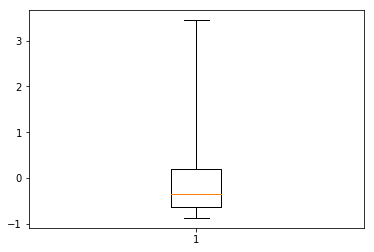

In [16]:
plt.boxplot(dfxstandard['C3'], whis='range')
plt.show()

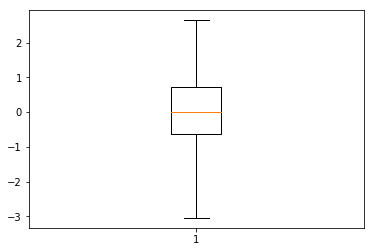

In [17]:
plt.boxplot(dfxstandard['C4'], whis='range')
plt.show()

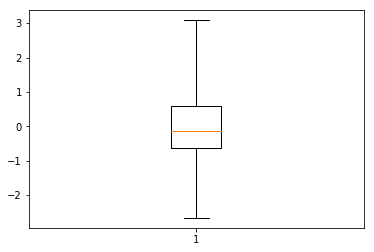

In [18]:
plt.boxplot(dfxstandard['C5'], whis='range')
plt.show()

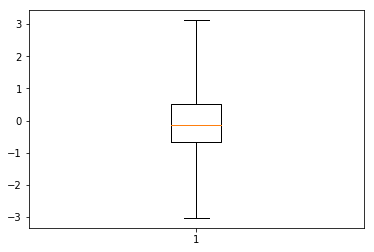

In [19]:
plt.boxplot(dfxstandard['C6'], whis='range')
plt.show()

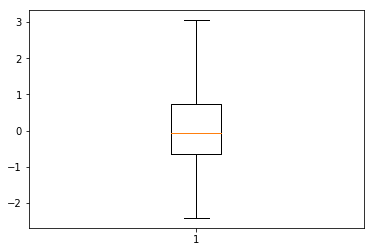

In [20]:
plt.boxplot(dfxstandard['C7'], whis='range')
plt.show()

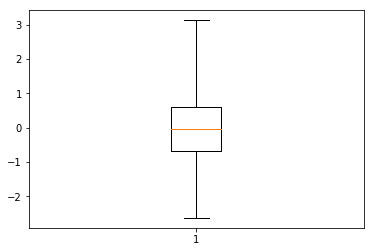

In [21]:
plt.boxplot(dfxstandard['T1'], whis='range')
plt.show()

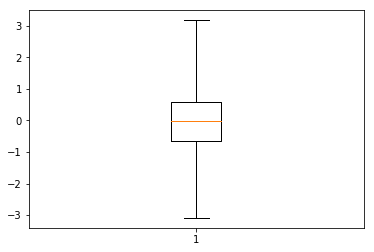

In [22]:
plt.boxplot(dfxstandard['T2'], whis='range')
plt.show()

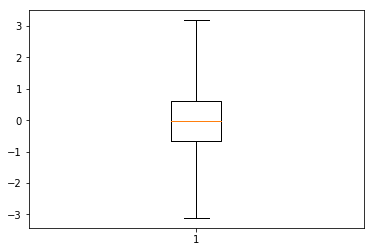

In [23]:
plt.boxplot(dfxstandard['T3'], whis='range')
plt.show()

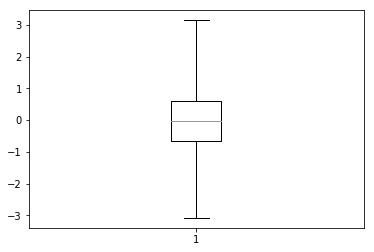

In [24]:
plt.boxplot(dfxstandard['T4'], whis='range')
plt.show()

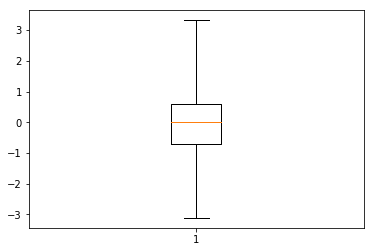

In [25]:
plt.boxplot(dfxstandard['T5'], whis='range')
plt.show()

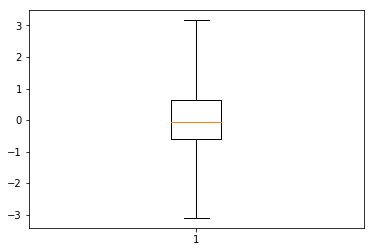

In [26]:
plt.boxplot(dfxstandard['S1'], whis='range')
plt.show()

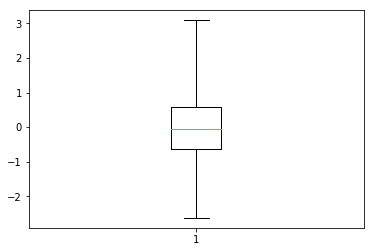

In [27]:
plt.boxplot(dfxstandard['S2'], whis='range')
plt.show()

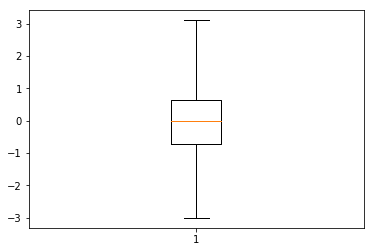

In [28]:
plt.boxplot(dfxstandard['S3'], whis='range')
plt.show()

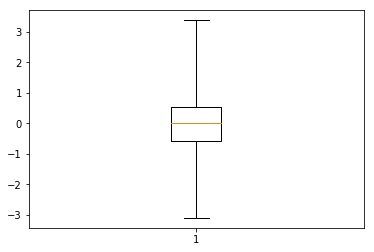

In [29]:
plt.boxplot(dfxstandard['C5p'], whis='range')
plt.show()

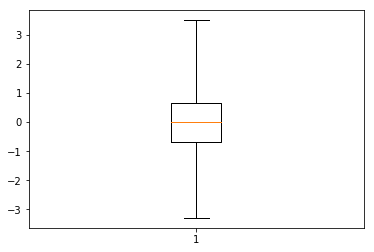

In [30]:
plt.boxplot(dfxstandard['LongSentences'], whis='range')
plt.show()

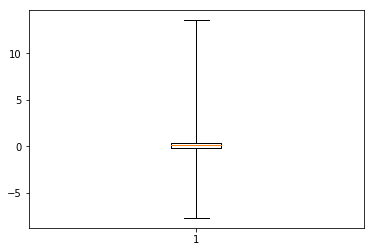

In [31]:
plt.boxplot(dfxstandard['RealWords'], whis='range')
plt.show()

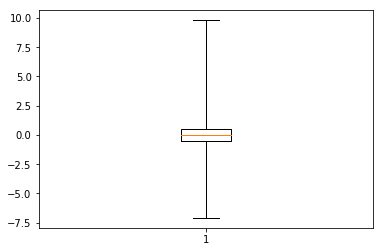

In [32]:
plt.boxplot(dfxstandard['LongWords'], whis='range')
plt.show()

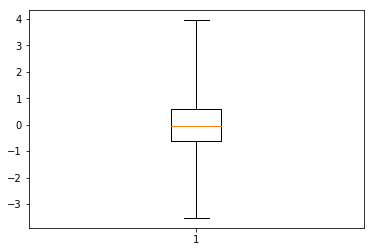

In [33]:
plt.boxplot(dfxstandard['PositiveWords'], whis='range')
plt.show()

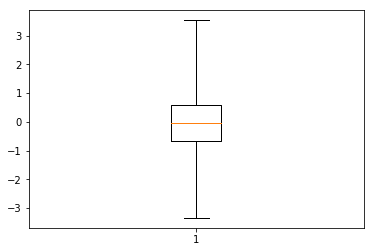

In [34]:
plt.boxplot(dfxstandard['NegativeWords'], whis='range')
plt.show()

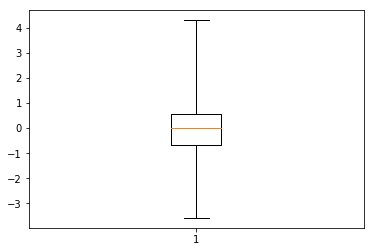

In [35]:
plt.boxplot(dfxstandard['UncertainWords'], whis='range')
plt.show()

In [40]:
# concat dfxstandard with dfbinary to create an updated dfx dataframe
dfx = pd.concat([dfxstandard, dfbinary], axis=1)
dfx.head()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
0,0.013297,0.668605,0.671107,0.342422,0.336688,-0.561408,0.130888,0.103580,0.147334,0.165458,...,0.089619,0.054797,0.168664,0.385146,0.310576,-0.147291,0.165044,-0.128181,1.0,0
1,1.259277,0.125370,-0.641901,-0.095487,-1.649356,-0.861441,1.873316,1.676114,1.702842,1.745124,...,1.480493,2.432764,0.229323,0.151570,-0.016410,-1.241195,0.781034,-0.147795,0.0,1
2,-0.447500,-0.036702,0.412402,-0.769717,-0.667998,-1.331894,-1.897238,-1.712503,-1.691886,-1.656210,...,-1.864381,-0.232390,0.118072,0.396011,1.107408,2.766871,-0.974778,0.044531,1.0,1
3,0.888201,-0.201539,0.390990,-0.927655,-0.808871,-1.282655,-0.833890,-0.884800,-0.835440,-1.055463,...,-0.482375,-0.276002,-1.244015,0.572529,1.093939,2.091573,-0.603481,0.697712,1.0,1
4,-0.619728,-0.800853,-1.308620,-0.016828,0.001567,0.887747,0.735656,0.509770,0.496018,0.461527,...,0.554103,-0.021399,-0.574359,-0.085643,-0.357698,-0.365024,0.448793,-0.006539,1.0,0


In [41]:
dfx.describe()

,C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,...,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,660.000000,682.000000
mean,-7.371099e-16,1.002782e-16,2.083703e-17,2.995323e-16,-2.185284e-15,3.906943e-17,3.268809e-16,-1.888356e-17,-4.799029e-16,1.693009e-17,...,1.974309e-15,-8.334812e-17,1.082223e-15,4.974841e-16,2.432723e-15,1.429941e-15,-8.100396e-16,-1.069200e-15,0.859091,0.463343
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,...,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,0.348192,0.499020
min,-3.003018e+00,-8.708319e-01,-3.046311e+00,-2.669182e+00,-3.027982e+00,-2.412942e+00,-2.624008e+00,-3.088709e+00,-3.110625e+00,-3.078635e+00,...,-3.010865e+00,-3.102178e+00,-3.298476e+00,-7.664677e+00,-7.096903e+00,-3.524846e+00,-3.339850e+00,-3.579637e+00,0.000000,0.000000
25%,-5.315021e-01,-6.317953e-01,-6.419006e-01,-6.358801e-01,-6.668820e-01,-6.584950e-01,-6.633327e-01,-6.584405e-01,-6.748366e-01,-6.634190e-01,...,-7.090413e-01,-5.802978e-01,-6.788953e-01,-2.084023e-01,-5.213248e-01,-6.125385e-01,-6.711211e-01,-6.560584e-01,1.000000,0.000000
50%,-1.461683e-01,-3.466355e-01,-3.319238e-03,-1.521470e-01,-1.258682e-01,-7.492592e-02,-3.032261e-02,-3.270748e-02,-2.761649e-02,-2.502104e-02,...,-1.411865e-03,3.063847e-03,9.598113e-03,1.105245e-01,3.310552e-02,-4.943467e-02,-4.991345e-02,5.463402e-03,1.000000,0.000000
75%,3.691021e-01,1.899863e-01,7.288663e-01,5.763972e-01,5.122234e-01,7.257601e-01,6.144183e-01,5.852731e-01,6.149760e-01,6.057772e-01,...,6.450816e-01,5.370669e-01,6.511760e-01,4.032022e-01,5.422655e-01,6.042630e-01,5.947703e-01,5.455320e-01,1.000000,1.000000
max,3.019685e+00,3.446764e+00,2.646272e+00,3.084676e+00,3.117609e+00,3.047990e+00,3.130786e+00,3.170045e+00,3.186467e+00,3.141925e+00,...,3.105259e+00,3.376404e+00,3.507758e+00,1.354047e+01,9.811542e+00,3.949526e+00,3.532883e+00,4.297567e+00,1.000000,1.000000


In [43]:
dfy = pd.read_csv('../csv_files/y.csv', index_col=0)
dfy.head()

,pIPO,pH,pL,p1day,Pmid,Y1,Y2,C6p
0,10.0,9.5,8.5,11.870000,9.0,0,1,11.111111
1,8.0,10.0,8.0,7.250000,9.0,1,0,0.000000
2,7.0,14.0,12.0,6.700000,13.0,1,0,0.000000
3,11.5,16.0,14.0,12.390000,15.0,1,1,0.000000
4,21.0,21.0,19.0,56.599998,20.0,0,1,5.000000


In [47]:
dfid = pd.read_csv('../csv_files/id.csv', index_col=0)
dfid.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [48]:
df = pd.concat([dfid, dfy], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2,C6p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1,11.111111
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1,5.000000


In [49]:
df = pd.concat([df, dfx], axis=1)
df.head()

,I1,I2,I3,pIPO,pH,pL,p1day,Pmid,Y1,Y2,...,S3,C5p,LongSentences,RealWords,LongWords,PositiveWords,NegativeWords,UncertainWords,C2,C3p
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,9.0,0,1,...,0.089619,0.054797,0.168664,0.385146,0.310576,-0.147291,0.165044,-0.128181,1.0,0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,9.0,1,0,...,1.480493,2.432764,0.229323,0.151570,-0.016410,-1.241195,0.781034,-0.147795,0.0,1
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,13.0,1,0,...,-1.864381,-0.232390,0.118072,0.396011,1.107408,2.766871,-0.974778,0.044531,1.0,1
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,15.0,1,1,...,-0.482375,-0.276002,-1.244015,0.572529,1.093939,2.091573,-0.603481,0.697712,1.0,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,20.0,0,1,...,0.554103,-0.021399,-0.574359,-0.085643,-0.357698,-0.365024,0.448793,-0.006539,1.0,0


In [50]:
# export total dataframe 
df.to_csv('../csv_files/p2final.csv')

In [52]:
# export only dfx dataframe 
dfx.to_csv('../csv_files/p2zscorex.csv')